In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import ccobra
from itertools import combinations, product
import pandas as pd
import numpy as np
import re
import dfs_utils
from dfs_semantics_python import *

In [2]:
def read_mesh(file):
        out = []
        with open(f"{file}", 'r') as f:
            contents = f.read().split('\n')
            for i in range(len(contents)):
                if contents[i].startswith('Name'):
                    match = re.search(r'\".+\"', contents[i])
                    ex_name = match[0].strip('\"').split()
                    ex_name[0] = ex_name[0].replace('_', ' ')
                    for j in range(i,len(contents)):
                        if contents[j].startswith('Input'):
                            match = re.search(r'Target ([0 1]+)', contents[j])
                            ex_target = [int(elem) for elem in match[0].strip('Target ').split()]
                            break
                    out.append((ex_name, np.array(ex_target)))
        return out

In [30]:
a = read_mesh('dfs_data/syllogism.mesh')
# remove all premises of the form '[Q] [A] are [A]'
a = [tup for tup in a if tup[0][-1] != tup[0][-2]]
# get all combinations to form doubles
p = [double for double in list(product(a, a))]
#remove all doubles that do not contain distinct A, B and C
p = [double for double in p if len(set([*double[0][0][1:], *double[1][0][1:]])) == 3] 
sen_sem_dict = {' '.join(tup[0]) : tup[1] for tup in a}
correct_responses = ccobra.syllogistic.SYLLOGISTIC_FOL_RESPONSES
[(d[0][0], d[1][0]) for d in p]

[(['All', 'trumpeters', 'pianists'], ['All', 'trumpeters', 'singers']),
 (['All', 'trumpeters', 'pianists'], ['All', 'pianists', 'singers']),
 (['All', 'trumpeters', 'pianists'], ['All', 'singers', 'trumpeters']),
 (['All', 'trumpeters', 'pianists'], ['All', 'singers', 'pianists']),
 (['All', 'trumpeters', 'pianists'], ['Some', 'trumpeters', 'singers']),
 (['All', 'trumpeters', 'pianists'], ['Some', 'pianists', 'singers']),
 (['All', 'trumpeters', 'pianists'], ['Some', 'singers', 'trumpeters']),
 (['All', 'trumpeters', 'pianists'], ['Some', 'singers', 'pianists']),
 (['All', 'trumpeters', 'pianists'], ['No', 'trumpeters', 'singers']),
 (['All', 'trumpeters', 'pianists'], ['No', 'pianists', 'singers']),
 (['All', 'trumpeters', 'pianists'], ['No', 'singers', 'trumpeters']),
 (['All', 'trumpeters', 'pianists'], ['No', 'singers', 'pianists']),
 (['All', 'trumpeters', 'pianists'], ['Some not', 'trumpeters', 'singers']),
 (['All', 'trumpeters', 'pianists'], ['Some not', 'pianists', 'singers'

In [31]:
full = []
for index,double in enumerate(p):
    t = ccobra.syllogistic.encode_task((double[0][0], double[1][0]))
    full.append((index, t, double[0][0], double[1][0], double[0][1], double[1][1]))
data = pd.DataFrame(full, columns=['index', 'type','premise1','premise2', 'sem1', 'sem2'])
data

,index,type,premise1,premise2,sem1,sem2
0,0,AA4,"[All, trumpeters, pianists]","[All, trumpeters, singers]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,1,AA1,"[All, trumpeters, pianists]","[All, pianists, singers]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,AA2,"[All, trumpeters, pianists]","[All, singers, trumpeters]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, ..."
3,3,AA3,"[All, trumpeters, pianists]","[All, singers, pianists]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,4,AI4,"[All, trumpeters, pianists]","[Some, trumpeters, singers]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ..."
...,...,...,...,...,...,...
379,379,OE4,"[Some not, singers, pianists]","[No, singers, trumpeters]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
380,380,OO3,"[Some not, singers, pianists]","[Some not, trumpeters, pianists]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ..."
381,381,OO2,"[Some not, singers, pianists]","[Some not, trumpeters, singers]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ..."
382,382,OO1,"[Some not, singers, pianists]","[Some not, pianists, trumpeters]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ..."


In [32]:
def find_inference(x):
    resp = ccobra.syllogistic.decode_response(response, (x['premise1'], x['premise2']))
    try:
        conclusion_sem = sen_sem_dict[' '.join(resp[0])]
    except KeyError:
        conclusion_sem = 'NVC'
    if conclusion_sem == 'NVC':
        score = None
        for r in ccobra.syllogistic.RESPONSES[:-1]:
            resp = ccobra.syllogistic.decode_response(r, (x['premise1'], x['premise2']))
            conclusion_sem = sen_sem_dict[' '.join(resp[0])]
            if dfs_utils.inferenceScore(conclusion_sem, dfs_utils.conjunction(x['sem1'],x['sem2'])) == 1:
                score = -1
                break
        if not score:
            score = 1

    else:
        score = dfs_utils.inferenceScore(conclusion_sem, dfs_utils.conjunction(x['sem1'],x['sem2']))

    return score

for response in ccobra.syllogistic.RESPONSES:
    data[response] = data.apply(find_inference, axis=1)

/tmp/ipykernel_122607/493551504.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if conclusion_sem == 'NVC':
/tmp/ipykernel_122607/493551504.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if conclusion_sem == 'NVC':
/tmp/ipykernel_122607/493551504.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if conclusion_sem == 'NVC':
/tmp/ipykernel_122607/493551504.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if conclusion_sem == 'NVC':
/tmp/ipykernel_122607/493551504.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if conclusion_sem == 'NVC':
/tmp/ipykernel_122607/49355150

In [7]:
by_type = data.groupby('type',as_index = False).mean()
types = by_type['type'].tolist()
by_type.pop('index')
by_type.pop('type')
by_type

,Aac,Aca,Iac,Ica,Eac,Eca,Oac,Oca,NVC
0,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.0
1,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.0
2,0.114592,0.114592,0.203077,0.203077,-0.203077,-0.203077,-0.114592,-0.114592,1.0
3,-0.006654,-0.006654,1.000000,1.000000,-1.000000,-1.000000,0.006654,0.006654,-1.0
4,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.0
...,...,...,...,...,...,...,...,...,...
59,0.028453,-0.205085,0.070721,0.070721,-0.070721,-0.070721,-0.028453,0.205085,1.0
60,-0.266275,0.028520,0.004070,0.004070,-0.004070,-0.004070,0.266275,-0.028520,1.0
61,0.028520,-0.266275,0.004070,0.004070,-0.004070,-0.004070,-0.028520,0.266275,1.0
62,-0.085712,-0.085712,0.161079,0.161079,-0.161079,-0.161079,0.085712,0.085712,1.0


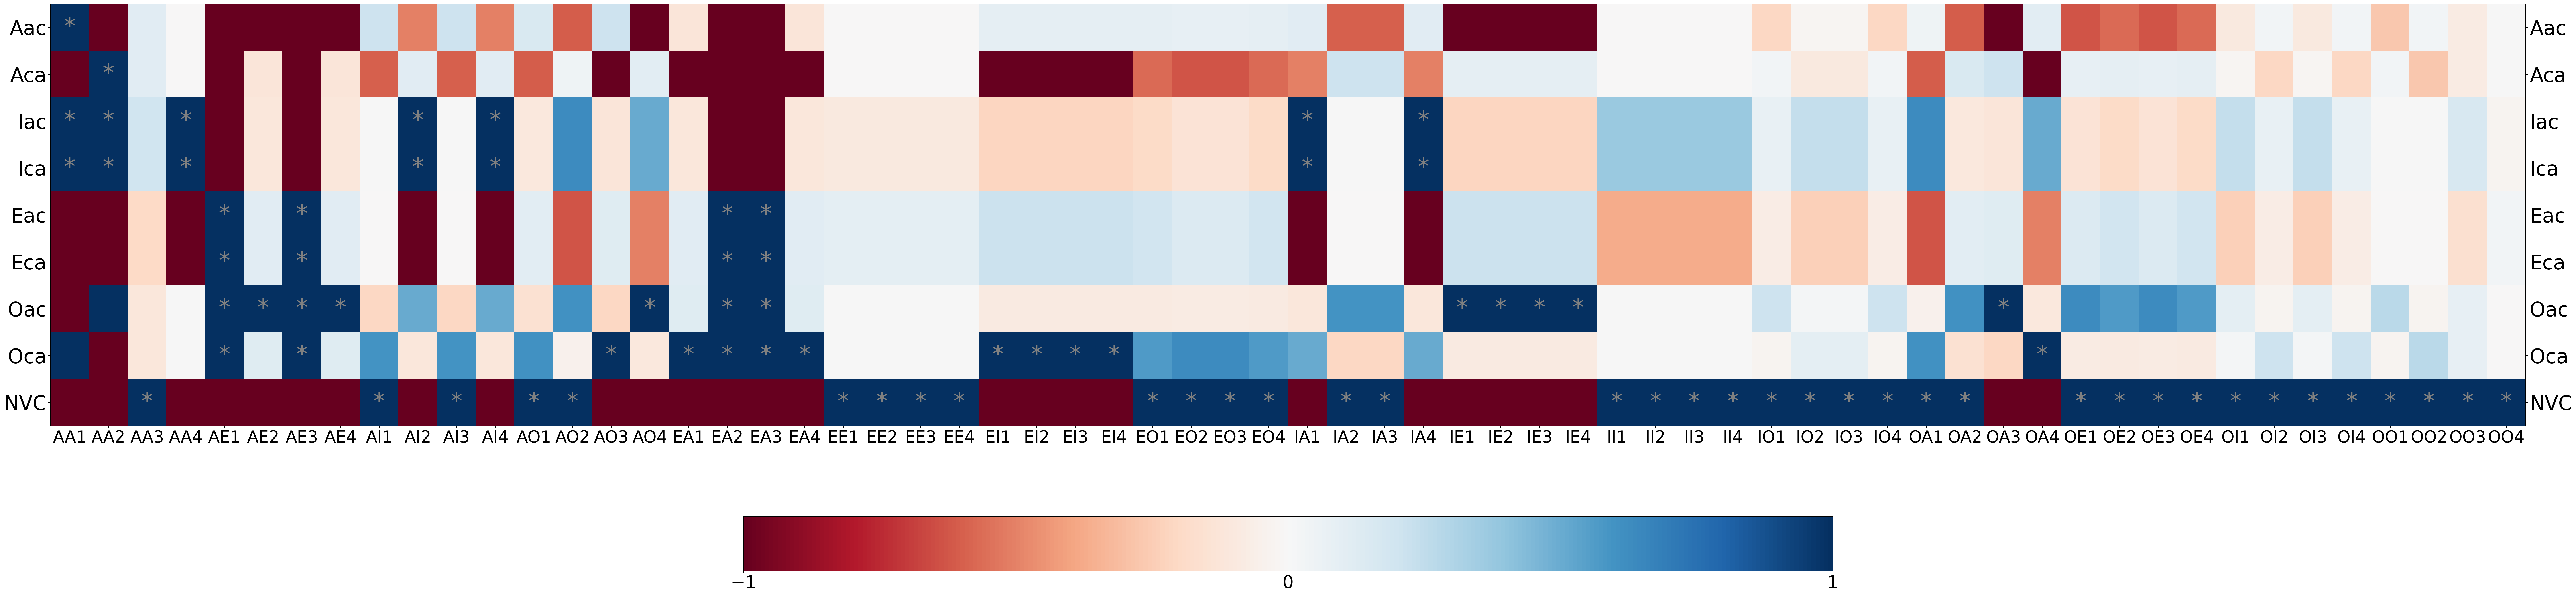

In [26]:
fig = plt.figure(figsize=(1,1), dpi=180)
ax = fig.add_subplot(111)
mat = ax.matshow(by_type.T, cmap=plt.get_cmap('RdBu'), aspect='auto')
cb = fig.colorbar(mat, location='bottom', shrink=0.44, ticks=[-1, 0, 1])
cb.ax.tick_params(labelsize=32)

ax.set_xticks(np.arange(by_type.shape[0]))
ax.set_yticks(np.arange(by_type.shape[1]))
ax.set_xticklabels(types, rotation=0, fontsize=30)
ax.set_yticklabels(by_type.columns.tolist(), rotation=0, fontsize=36)
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
ax.tick_params(axis="y", left=True, right=True, labelleft=True, labelright=True)

fig.align_xlabels()

x_labels = list(ax.get_xticklabels())
y_labels = list(ax.get_yticklabels())
min_val, max_val, diff = 0., 64., 1.
ind_array = np.arange(min_val, max_val, diff)
ind_array_y = np.arange(min_val, 9, diff)
x, y = np.meshgrid(ind_array, ind_array_y)
for x_val, y_val in zip(x.flatten(), y.flatten()):
    if y_labels[int(y_val)].get_text() in correct_responses[x_labels[int(x_val)].get_text()]:
        plt.text(x_val, y_val, '*', va='center', ha='center', color='gray', fontsize=42)


fig.set_size_inches(80, 20, forward=True)

plt.savefig('test.png')

In [39]:
c = dfs_utils.xor(a, b)
c2 = dfs_utils.conjunction(a, b)
one = dfs_utils.inferenceScore(d, c)
two = dfs_utils.inferenceScore(d, c2)
print(one, two, one-two, two-one, two*one)

-0.03786648100874127 1.0 -1.0378664810087412 1.0378664810087412 -0.03786648100874127


In [105]:
def maprange(x):
    slope = 1.0 * (-1 - 1) / (2 - 0)
    return 1 + slope * (x - 0)


def NVCscore(CONJ, d):
    xor_vec = dfs_utils.xor(a, b)
    xor_inf = dfs_utils.inferenceScore(d, xor_vec)
    if CONJ > xor_inf:
        return maprange(CONJ - xor_inf)
    else:
        return maprange(xor_inf - CONJ)

test = data.iloc[0]
scores = []
for conclusion in ccobra.syllogistic.RESPONSES:
    resp = ccobra.syllogistic.decode_response(conclusion, (test['premise1'], test['premise2']))
    try:
        conclusion_sem = sen_sem_dict[' '.join(resp[0])]
    except KeyError:
        conclusion_sem = 'NVC'
    if conclusion_sem == 'NVC':
        l = [NVCscore(test['sem1'], test['sem2'], S,conc) for S,conc in scores]
        print(l)
        print(np.mean(l))
        print(sum(l))
    else:
        score = dfs_utils.inferenceScore(conclusion_sem,dfs_utils.conjunction(test['sem1'],test['sem2']))
        scores.append((score, conclusion_sem))
        print(score)

0.08931462493254182
0.08826906193016815
1.0
1.0
-1.0
-1.0
-0.08931462493254187
-0.08826906193016822
-0.14617486338797808
-0.2798746134621087
0.48122017015978513
0.48122017015978513
-0.48122017015978424
-0.48122017015978424
0.14617486338797894
0.2798746134621096
[0.7645105116794801, 0.6318563246077231, 0.48122017015978513, 0.48122017015978513, 0.48122017015978424, 0.48122017015978424, 0.7645105116794793, 0.6318563246077222]
0.5897017941516929
4.717614353213544


/tmp/ipykernel_116819/3059093921.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if conclusion_sem == 'NVC':


In [85]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
def tanh(x):
    return np.tanh(x)

In [91]:
def diff(x, y):
    if x < y:
        return y - x
    else:
        return x - y

diff(1,-1)

2

In [108]:
#output start: 1, output end: -1
#input start 0, input end: 2
maprange(1)

0.0